In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib notebook
plt.style.use('default')

In [2]:
auctions = pd.read_csv('../../data/auctions.csv')
clicks = pd.read_csv('../../data/clicks.csv')
### Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
events = pd.read_csv('../../data/events.csv',low_memory=False)
###
installs = pd.read_csv('../../data/installs.csv')
target_competencia = pd.read_csv('../../data/target_competencia.csv')

In [3]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [4]:
################################################################
## AUCTIONS.
################################################################
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################
################################################################

In [5]:
auctions['device_id'].value_counts()

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
8963711959081981780    14362
795159065504552200     12275
6841615430383729819    12077
5384039226444052914    11632
3198179064438296471    11565
519658456951133298     10541
2435544514359302887    10274
8751190726444323885    10256
1835469468095030098    10121
1800317677967270083    10036
9027154272484048876     9958
7574657722181550308     9767
5051610571898428259     9642
320899491737875154      9388
8292793494956750501     9315
201759600719985554      9158
8021195662481548645     9128
7650408579713341483     9020
6392567838173461255     8994
1478017482044456084     8839
6203407103275384250     8823
68016455690089173       8809
8496718680483076445     8682
8491787427844905567     8513
4834359787191717922     8495
                       ...  
5751956180575781757        1
2048572451559832028        1
3744576664345883432        1
73670867056061

Text(0, 0.5, 'Cantidad de subastas')

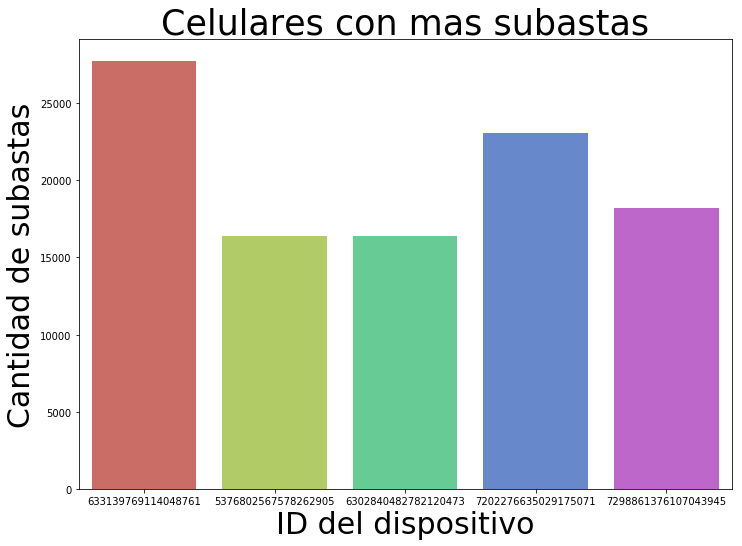

In [10]:
device_tops = list([633139769114048761, 7202276635029175071, 6302840482782120473, 7298861376107043945, 5376802567578262905])

auctions_top = auctions[(auctions['device_id'].isin(device_tops))]

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="device_id", data=auctions_top, palette="hls")
g.set_title("Celulares con mas subastas", fontsize=35)
g.set_xlabel("ID del dispositivo", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  if sys.path[0] == '':


Text(0, 0.5, 'Cantidad de subastas')

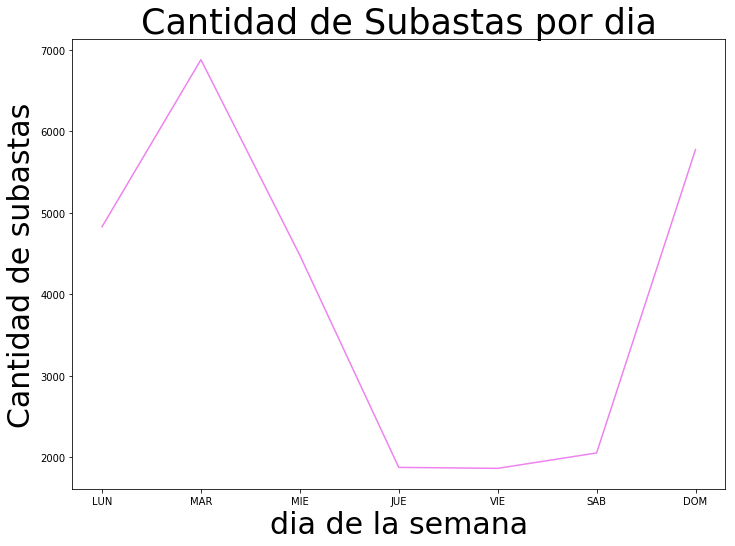

In [7]:
device1 = list([633139769114048761])
auctions1 = auctions[(auctions['device_id'].isin(device1))]
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)


auctions1 = auctions1.groupby('nombre_dia').count()[['device_id']].reset_index()

auctions1['nombre_dia'] = pd.Categorical(auctions1['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
auctions1.index = pd.CategoricalIndex(auctions1.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
auctions1.sortlevel(level=0, inplace=True)

g = sns.lineplot(x="nombre_dia", y="device_id", data=auctions1, color='violet')
g.set_title("Cantidad de Subastas por dia", fontsize=35)
g.set_xlabel("dia de la semana", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4534: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, sort_remaining=sort_remaining)


Text(0, 0.5, 'Cantidad de subastas')

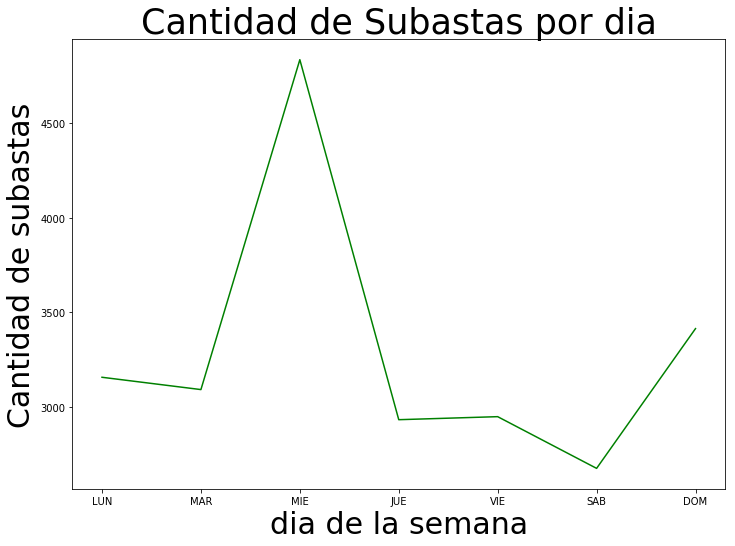

In [8]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device2 = list([7202276635029175071])
auctions2 = auctions[(auctions['device_id'].isin(device2))]


auctions2['nombre_dia'] = pd.Categorical(auctions2['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
auctions2.index = pd.CategoricalIndex(auctions2.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
auctions2.sortlevel(level=0, inplace=True)

auctions2 = auctions2.groupby('nombre_dia').count()[['device_id']].reset_index()
g = sns.lineplot(x="nombre_dia", y="device_id", data=auctions2, color='green')
g.set_title("Cantidad de Subastas por dia", fontsize=35)
g.set_xlabel("dia de la semana", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

In [11]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [14]:
installs['ref_hash'].value_counts()

5208834946313176321    4
3272750442824629569    4
1999001885916451618    3
2457547163021424058    3
2515049144505739996    3
5376622639905210608    3
470581161921490835     3
2807966731127456435    3
394181128078904930     3
1332624341050561368    3
8209340170282049305    3
1826618012885478111    3
6207088909238189318    3
4603142710878547974    3
4587898421740190562    3
3429460795301152906    3
1838099903940931904    3
808602801225309575     3
2756309363004630634    3
5716316704073038128    3
1951826604052927528    3
5707101515634134793    3
3293250764324184935    3
6697381140026413622    2
1051816244049516468    2
2429923283539157643    2
8378288095655268347    2
4049391409413329307    2
1162390149017457197    2
8956666120381022264    2
                      ..
432026705480919604     1
868940215859934734     1
4424921869962083331    1
667593224187123722     1
826262859425189535     1
3807326297196549242    1
453115979634562298     1
2987878111541902309    1
3081130218041894318    1


In [15]:
 installs_dev_id = pd.merge(installs, auctions, left_on='ref_hash', right_on='device_id', how='inner')